In [1]:
import pandas as pd 
import numpy as np

import re

import matplotlib.pyplot as plt
from  wordcloud import WordCloud
%matplotlib inline

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Thaku\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Thaku\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Thaku\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df = pd.read_csv('mail_dataset.csv' )

In [3]:
df.head()

,text,label
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
df.columns

Index(['text', 'label'], dtype='object')

In [5]:
df.label.unique()

array([0, 1], dtype=int64)

In [6]:
df.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
0      3672   3531  Subject: calpine daily gas nomination\r\n>\r\n...   20
1      1499   1462                                      Subject: \r\n   16

In [7]:
df.drop_duplicates(inplace=True)
df.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
0      3531   3531  Subject: enron methanol ; meter # : 988291\r\n...    1
1      1462   1462  Subject: photoshop , windows , office . cheap ...    1

<AxesSubplot:>

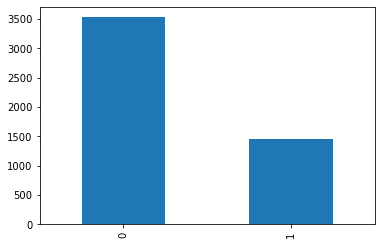

In [8]:
df.label.value_counts().plot(kind='bar')

In [9]:
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].replace(r'[^A-Za-z0-9 ]+', '', regex=True)

In [10]:
df.shape

(4993, 2)

In [11]:
def clean_text(text, lemmatizer = WordNetLemmatizer(), 
                  stop_words = set(stopwords.words('english'))):
      
    words = word_tokenize(text)
    
    filtered_words = []
    
    for word in words:
        
        if word not in stop_words and word.isalpha():
            filtered_words.append(lemmatizer.lemmatize(word))
    
    return filtered_words

SPAM EDA

In [12]:
df_spam = df[df['label'] == 1]

In [13]:
df_spam.head()

,text,label
3,subject photoshop windows office cheap mai...,1
7,subject looking for medication we re the bes...,1
10,subject vocable rnd word asceticismvcsc bra...,1
11,subject report 01405 wffur attion brom est ins...,1
13,subject vic odin n owberne hotbox carnal bri...,1


In [14]:
spam_nested_list = df_spam['text'].apply(lambda x: clean_text(x))

In [15]:
spam_nested_list[:10]

3     [subject, photoshop, window, office, cheap, ma...
7     [subject, looking, medication, best, source, d...
10    [subject, vocable, rnd, word, asceticismvcsc, ...
11    [subject, report, wffur, attion, brom, est, in...
13    [subject, vic, odin, n, owberne, hotbox, carna...
15    [subject, underpriced, issue, high, return, eq...
24    [subject, jump, gain, substantial, ground, imm...
35    [subject, end, year, clearanceitem, descriptio...
40    [subject, vlc, dln, sale, prior, pres, crip, t...
41    [subject, jennifersends, final, destination, d...
Name: text, dtype: object

In [16]:
word_length_spam = [len(w) for w in spam_nested_list]

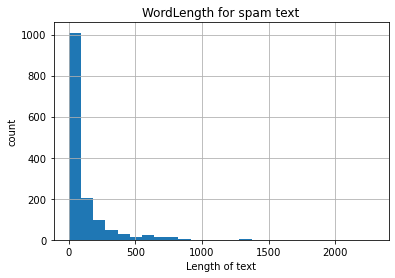

In [17]:
plt.hist(word_length_spam, bins=25)
plt.title('WordLength for spam text')
plt.ylabel('count')
plt.xlabel('Length of text')
plt.grid()
plt.show()

In [18]:
df_spam.head()

,text,label
3,subject photoshop windows office cheap mai...,1
7,subject looking for medication we re the bes...,1
10,subject vocable rnd word asceticismvcsc bra...,1
11,subject report 01405 wffur attion brom est ins...,1
13,subject vic odin n owberne hotbox carnal bri...,1


In [19]:
words_spam = clean_text(''.join(str(df_spam['text'].tolist())))

In [20]:
words_spam[:15]

['photoshop',
 'window',
 'office',
 'cheap',
 'main',
 'trendingabasements',
 'darer',
 'prudently',
 'fortuitous',
 'undergonelighthearted',
 'charm',
 'orinoco',
 'tasterrailroad',
 'affluent',
 'pornographic']

In [21]:
(pd.Series(nltk.ngrams(words_spam, 2)).value_counts())[:12]

(http, www)             358
(nbsp, nbsp)            295
(pill, pill)            169
(width, height)         164
(href, http)            159
(src, http)             154
(looking, statement)    136
(http, nd)              136
(e, mail)               113
(www, computron)        112
(font, size)            111
(forward, looking)      108
dtype: int64

In [22]:
(pd.Series(nltk.ngrams(words_spam, 3)).value_counts())[:12]

(nbsp, nbsp, nbsp)               245
(forward, looking, statement)     98
(pill, pill, pill)                91
(src, http, nd)                   84
(font, size, pt)                  79
(ali, duty, free)                 79
(border, src, http)               73
(href, http, www)                 73
(www, moopid, com)                73
(moopid, com, hotlist)            73
(http, www, moopid)               73
(pt, font, family)                66
dtype: int64

Text(0.5, 0, '# of Occurances')

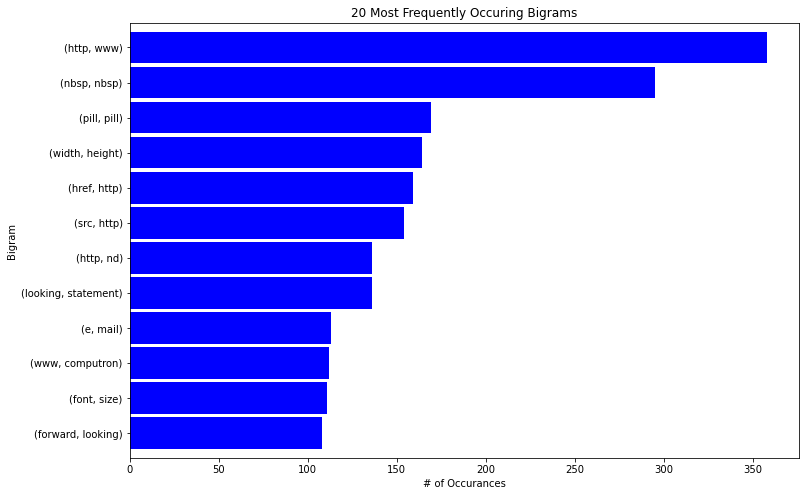

In [23]:
bigrams_series_spam = (pd.Series(nltk.ngrams(words_spam, 2)).value_counts())[:12]
trigrams_series_spam = (pd.Series(nltk.ngrams(words_spam, 3)).value_counts())[:12]

bigrams_series_spam.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

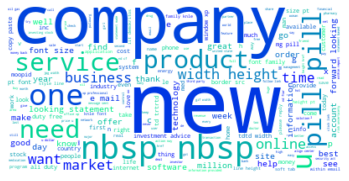

In [24]:
word_cloud = WordCloud( background_color='white', colormap='winter')
word_cloud.generate(','.join(words_spam))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

HAM EDA

In [25]:
df_ham = df[df['label'] == 0]

In [26]:
df_ham.sample(15)

,text,label
120,subject txu noms for 3 14 01 see attached f...,0
1477,subject enron hpl actuals for september 25 2...,0
2994,subject defs 2001i have some changes to the de...,0
5165,subject fw crosstex energy driscoll ranch 1...,0
669,subject re 6 4 99 and 6 9 99 98 0439 e...,0
4696,subject urgented has requested that we compile...,0
1180,subject re may activity surveythanks daren t...,0
3045,subject hpl meter 986290 indian hills plant ...,0
3757,subject hpl meter 989648 tram hpl transtexa...,0
2452,subject hpl nom for april 18 2001 see attache...,0


In [27]:
ham_nested_list = df_ham['text'].apply(lambda x: clean_text(x))

In [28]:
ham_nested_list[:10]

0     [subject, enron, methanol, meter, follow, note...
1     [subject, hpl, nom, january, see, attached, fi...
2     [subject, neon, retreatho, ho, ho, around, won...
4     [subject, indian, springsthis, deal, book, tec...
5     [subject, ehronline, web, address, changethis,...
6     [subject, spring, saving, certificate, take, o...
8     [subject, noms, actual, flow, agree, forwarded...
9     [subject, nomination, oct, see, attached, file...
12    [subject, enron, hpl, actuals, august, tap, en...
14    [subject, tenaska, iv, julydarren, please, rem...
Name: text, dtype: object

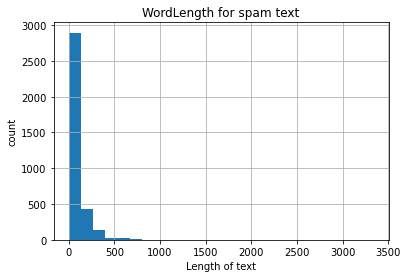

In [29]:
word_length_ham = [len(w) for w in ham_nested_list]

plt.hist(word_length_ham, bins=25)
plt.title('WordLength for spam text')
plt.ylabel('count')
plt.xlabel('Length of text')
plt.grid()
plt.show()

In [30]:
words_ham = clean_text(''.join(str(df_ham['text'].tolist())))

In [31]:
(pd.Series(nltk.ngrams(words_ham, 2)).value_counts())[:12]

(hou, ect)           7093
(ect, ect)           4199
(ect, ectcc)         1343
(corp, enron)        1167
(enron, enron)        965
(let, know)           792
(daren, j)            782
(ect, ectsubject)     702
(j, farmer)           599
(enron, com)          579
(ectcc, subject)      570
(see, attached)       503
dtype: int64

In [32]:
(pd.Series(nltk.ngrams(words_ham, 3)).value_counts())[:12]

(hou, ect, ect)           4140
(hou, ect, ectcc)         1337
(hou, ect, ectsubject)     700
(ect, ectcc, subject)      569
(daren, j, farmer)         569
(corp, enron, enron)       552
(j, farmer, hou)           494
(farmer, hou, ect)         487
(see, attached, file)      449
(please, let, know)        311
(hou, ect, pm)             284
(north, america, corp)     252
dtype: int64

Text(0.5, 0, '# of Occurances')

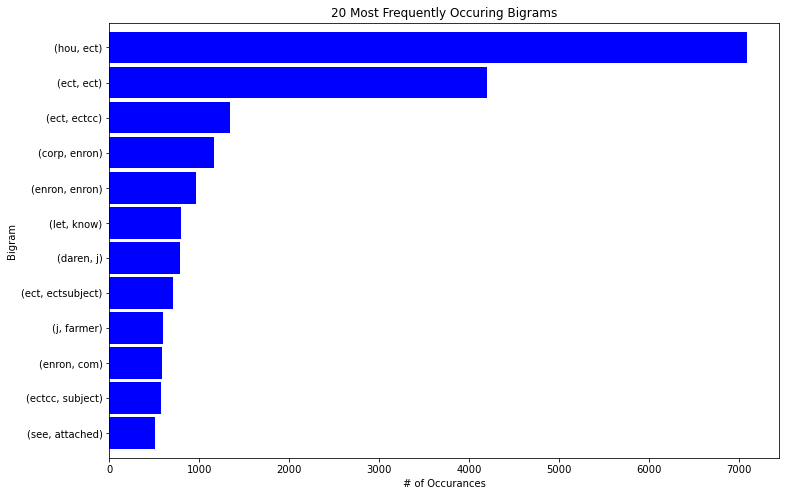

In [33]:
bigrams_series_ham = (pd.Series(nltk.ngrams(words_ham, 2)).value_counts())[:12]
trigrams_series_ham = (pd.Series(nltk.ngrams(words_ham, 3)).value_counts())[:12]

bigrams_series_ham.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

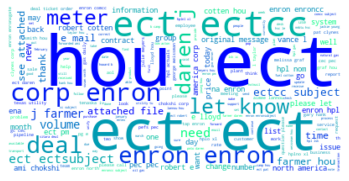

In [34]:
word_cloud = WordCloud( background_color='white', colormap='winter')
word_cloud.generate(','.join(words_ham))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer=clean_text)
bow = cv.fit(df['text'])
transformed_text = cv.transform(df['text'])

In [36]:
transformed_text.shape

(4993, 62438)

In [37]:
#Splitting data into Training an Testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(transformed_text,df['label'],test_size=0.30,random_state=0)

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

In [39]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=5, learning_rate = learning_rate, max_depth = 6, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.699
Accuracy score (validation): 0.727
Learning rate:  0.1
Accuracy score (training): 0.792
Accuracy score (validation): 0.790
Learning rate:  0.25
Accuracy score (training): 0.930
Accuracy score (validation): 0.913
Learning rate:  0.5
Accuracy score (training): 0.940
Accuracy score (validation): 0.923
Learning rate:  0.75
Accuracy score (training): 0.947
Accuracy score (validation): 0.925
Learning rate:  1
Accuracy score (training): 0.939
Accuracy score (validation): 0.910


In [40]:
import pickle

In [41]:
pickle.dump(gb,open("model.pkl","wb"))
pickle.dump(cv,open("count_vectorizer.pkl","wb"))

In [42]:
feature_transformer = pickle.load(open("count_vectorizer.pkl","rb"))
model = pickle.load(open("model.pkl","rb"))

In [43]:
msg = "Hello there"
data = [msg]
res = feature_transformer.transform(data).toarray()
result = model.predict(res)
prob = model.predict_proba(res) 
print(f"class is {result[0]}, with probabilities  : Not Spam {round(prob.T[0][0],3)} and Spam {round(prob.T[1][0],3)}")

class is 1, with probabilities  : Not Spam 0.416 and Spam 0.584
